# Cardiomyocite

## Example ECG data
taken from https://www.physionet.org/content/autonomic-aging-cardiovascular/1.0.0/


In [24]:
import numpy as np
import wfdb # asks for citation
import matplotlib.pyplot as plt

In [25]:
header = wfdb.rdheader('../data/Schuhmann_Baer_PhysioNet_2021/0001')
print(header.n_sig)
print(header.sig_len)
print(header.sig_name)
print(header.init_value)
print(header.skew)
print(header.byte_offset)
print(header.samps_per_frame)
print(header.file_name)
print(header.fmt)

3
900401
['ECG1', 'ECG2', 'NIBP']
[5833, -15951, -20028]
[None, None, None]
[None, None, None]
[1, 1, 1]
['0001.dat', '0001.dat', '0001.dat']
['16', '16', '16']


In [26]:
record = wfdb.rdrecord('../data/Schuhmann_Baer_PhysioNet_2021/0001')
# follow https://github.com/wfdb/wfdb-python/blob/main/wfdb/io/record.py#L1784 and check how this is actually read from hea file
# path = '../data/Schuhmann_Baer_PhysioNet_2021/'
# file_hea = '0001.hea'
# with open(path+file_hea, encoding='ascii', errors="ignore") as f:
#     header_content = f.read()
#     header_lines, comment_lines = header.parse_header_content(header_content)

# print(header_content)


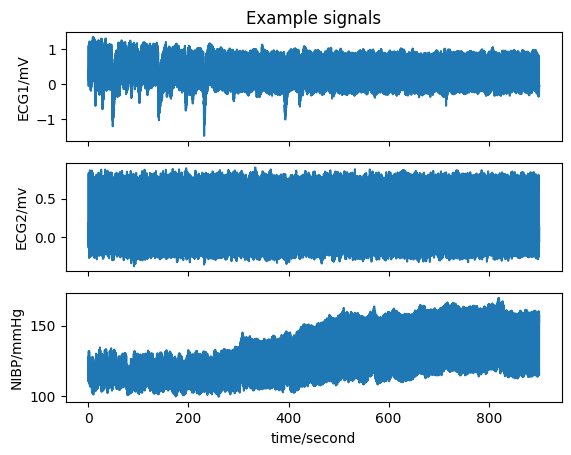

In [27]:
wfdb.plot_wfdb(record=record, title='Example signals')

In [36]:
print(record.p_signal)
print(record.p_signal.shape)
print(record.fs)
print(record.sig_name)
print(record.units)
print(record.baseline)
print(record.adc_gain)

[[ 1.86326741e-01 -5.40546516e-02  1.13253152e+02]
 [ 1.89794679e-01 -6.73756151e-02  1.13236058e+02]
 [ 1.98485931e-01 -7.54788718e-02  1.13218964e+02]
 ...
 [-2.42327517e-02  1.06903697e-01  1.53678652e+02]
 [-2.07648137e-02  9.99467543e-02  1.53162636e+02]
 [-4.62819869e-02 -5.34814944e-02  1.52646621e+02]]
(900401, 3)
1000
['ECG1', 'ECG2', 'NIBP']
['mV', 'mv', 'mmHg']
[1481, -13216, -126035]
[23356.8192, 50596.9407, 936.0181]


In [32]:
record.p_signal.shape

(900401, 3)

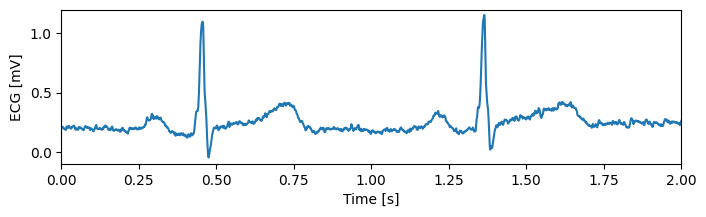

In [41]:
signal=record.p_signal
dt = 1/record.fs
time = np.arange(0, len(signal)*dt, dt)
cm = 1/2.54
fig, ax = plt.subplots(figsize = (8, 2))
ax.plot(time-0.4, signal[:,0])
ax.set_xlabel('Time [s]')
ax.set_ylabel('ECG [mV]')
ax.set_xlim([0, 2])
ax.set_ylim([-0.1, 1.2])
# save to pdf
plt.savefig('../ecg_example.pdf', bbox_inches='tight')


In [44]:
mask = (time > 0.4) & (time < 2.4)
print(signal[mask,0])

[0.20430864 0.20255327 0.20953196 ... 0.23620511 0.24896369 0.25534299]
